In [ ]:
%cd /content/ujian-tengah-semester-DillaRegita

/content/ujian-tengah-semester-DillaRegita


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
!git add preprocessing_data.py

In [ ]:
!python preprocessing_data.py

🔹 Data hilang sebelum ditangani:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

🔹 Kolom kategorikal: ['gender', 'age', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status']
Jumlah data latih: 4088
Jumlah data uji: 1022

🔹 Evaluasi Model:
Accuracy: 0.8953033268101761
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.13      0.13      0.13        62

    accuracy                           0.90      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.89      0.90      0.89      1022


🔹 Data setelah preprocessing:
   gender       age  hypertension  ...       bmi  smo

In [ ]:
%%writefile /content/ujian-tengah-semester-DillaRegita/preprocessing_data.py

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membaca CSV dengan delimiter titik koma dan koma desimal
df = pd.read_csv("/content/ujian-tengah-semester-DillaRegita/healthcare-dataset-stroke-data.csv", delimiter=';', decimal=',')

# 1. Tangani data hilang
# Tampilkan data hilang
print("🔹 Data hilang sebelum ditangani:")
print(df.isnull().sum())

# Membersihkan kolom bmi dari karakter yang tidak diinginkan dan mengubahnya menjadi numerik
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')  # Mengubah menjadi numerik dan mengganti yang tidak bisa menjadi NaN

# Imputasi: Mengisi missing value di 'bmi' dengan median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# 2. Encoding data kategorikal
# Kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\n🔹 Kolom kategorikal:", categorical_cols)

# Drop kolom 'id' karena tidak berguna sebagai fitur
df.drop('id', axis=1, inplace=True)

# Label encoding untuk semua kolom kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 3. Normalisasi fitur numerik
scaler = MinMaxScaler()

# Kolom numerik (setelah encoding)
numeric_cols = df.select_dtypes(include='number').drop('stroke', axis=1).columns  # kecuali target
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 4. Pisahkan data menjadi fitur dan target
X = df.drop('stroke', axis=1)  # Fitur
y = df['stroke']  # Target

# 5. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


# 6. Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Prediksi dan evaluasi model
y_pred = model.predict(X_test)
print("\n🔹 Evaluasi Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Tampilkan data setelah preprocessing
print("\n🔹 Data setelah preprocessing:")
print(df.head())

# Simpan data setelah preprocessing
df.to_csv("/content/ujian-tengah-semester-DillaRegita/data_setelah_dibersihkan.csv", index=False)
print("✅ Data setelah dibersihkan berhasil disimpan.")



Overwriting /content/ujian-tengah-semester-DillaRegita/preprocessing_data.py


In [ ]:
!git add gambar_fitur

🔹 Akurasi: 0.8953033268101761

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.13      0.13      0.13        62

    accuracy                           0.90      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.89      0.90      0.89      1022


🔹 Confusion Matrix:


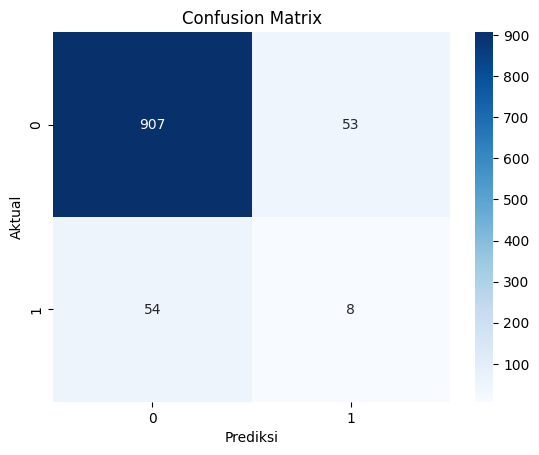

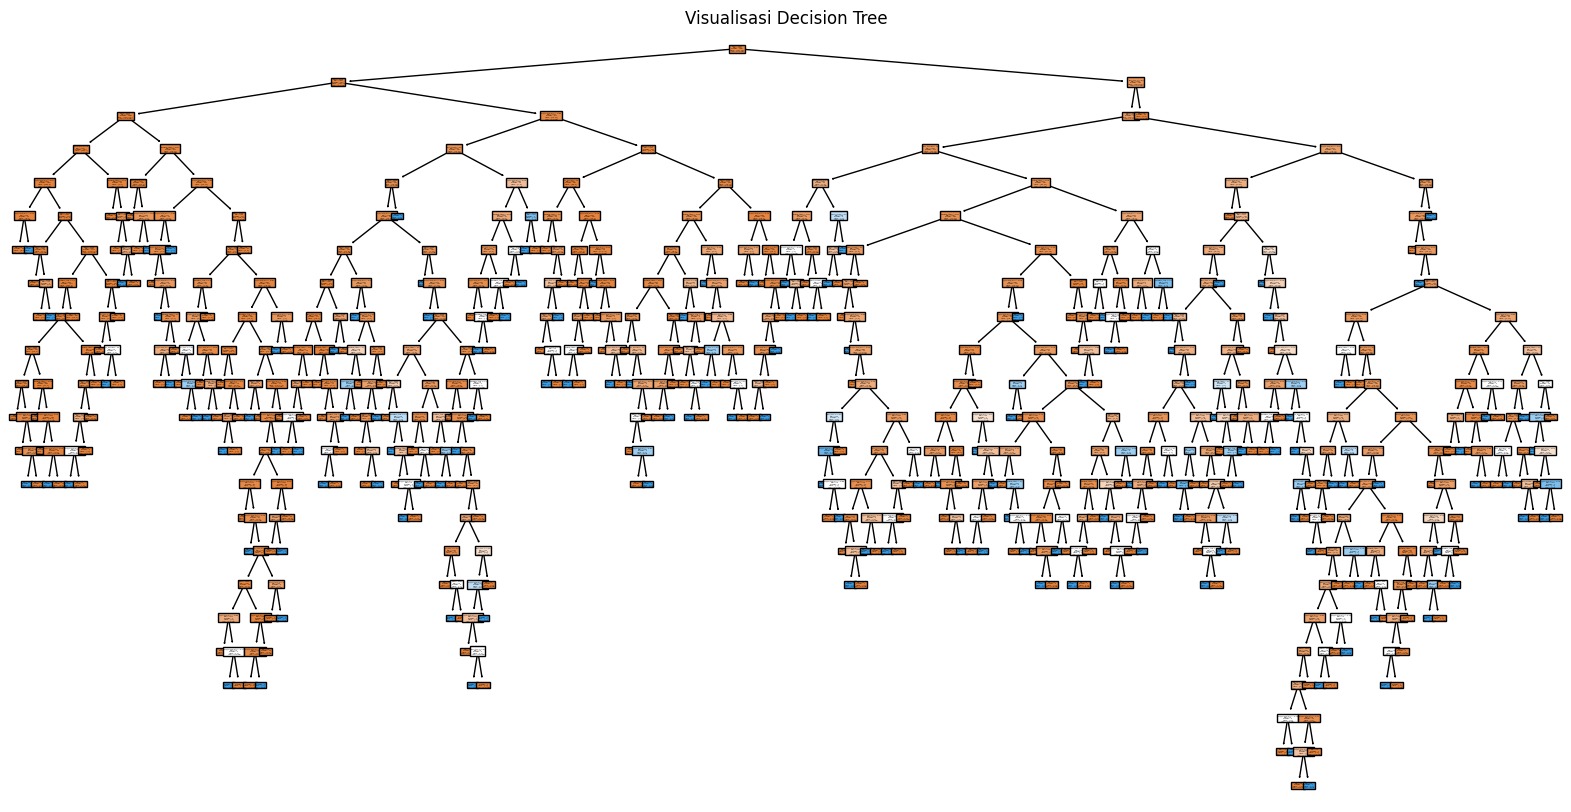

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 2. Simpan X dan y ke dalam file CSV
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

# 3. Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 5. Prediksi data uji
y_pred = dt_model.predict(X_test)

# 6. Evaluasi model
print("🔹 Akurasi:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# 7. (Opsional) Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()


In [ ]:
%%writefile /content/ujian-tengah-semester-DillaRegita/training_evaluasi.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Buat folder untuk menyimpan gambar
output_dir = "/content/ujian-tengah-semester-DillaRegita/plots"
os.makedirs(output_dir, exist_ok=True)

# 1. Baca data
df = pd.read_csv("/content/ujian-tengah-semester-DillaRegita/healthcare-dataset-stroke-data.csv", delimiter=';', decimal=',')

# 2. Tangani data hilang
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')  # ubah ke numerik
df['bmi'] = df['bmi'].fillna(df['bmi'].median())       # isi NaN dengan median

# 3. Hapus kolom yang tidak relevan
df.drop('id', axis=1, inplace=True)

# 4. Label encoding untuk kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 5. Normalisasi fitur numerik
scaler = MinMaxScaler()
X_numerik = df.drop('stroke', axis=1)
df[X_numerik.columns] = scaler.fit_transform(X_numerik)

# 6. Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

# 8. Latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 9. Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("\n🔹 Evaluasi Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.savefig(f"{output_dir}/confusion_matrix.png", dpi=300)
plt.close()

# 11. Visualisasi Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True, fontsize=8)
plt.title("Visualisasi Struktur Pohon Keputusan")
plt.tight_layout()
plt.savefig(f"{output_dir}/decision_tree.png", dpi=300)
plt.close()

# 12. Simpan data setelah preprocessing
df.to_csv("/content/ujian-tengah-semester-DillaRegita/data_setelah_dibersihkan.csv", index=False)
print("\n✅ Data setelah dibersihkan dan visualisasi berhasil disimpan.")


Overwriting /content/ujian-tengah-semester-DillaRegita/training_evaluasi.py


In [ ]:
!python training_evaluasi.py

Jumlah data latih: 4088
Jumlah data uji: 1022

🔹 Evaluasi Model:
Accuracy: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.22      0.26      0.24        50

    accuracy                           0.92      1022
   macro avg       0.59      0.61      0.60      1022
weighted avg       0.93      0.92      0.92      1022


✅ Data setelah dibersihkan dan visualisasi berhasil disimpan.


In [ ]:
!git add training_evaluasi.py

In [ ]:
!git add plots

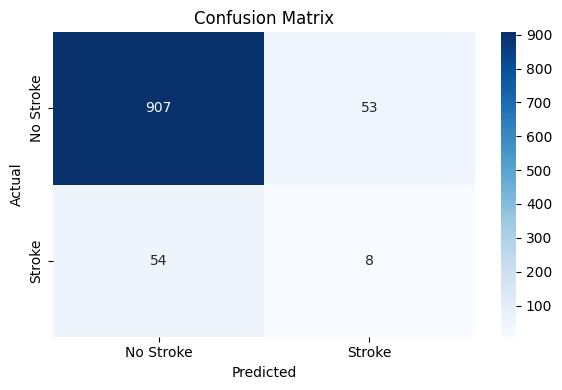

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Buat folder jika belum ada
output_dir = "/content/ujian-tengah-semester-DillaRegita/plots"
os.makedirs(output_dir, exist_ok=True)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Simpan gambar ke folder
plt.savefig(f"{output_dir}/confusion_matrix.png", dpi=300)

# Tampilkan di layar
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔹 Evaluasi KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


🔹 Evaluasi KNN:
Accuracy: 0.9452054794520548
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.12      0.02      0.03        50

    accuracy                           0.95      1022
   macro avg       0.54      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', class_weight='balanced')  # balanced karena data tidak seimbang
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔹 Evaluasi SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


🔹 Evaluasi SVM:
Accuracy: 0.7270058708414873
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       972
           1       0.12      0.76      0.21        50

    accuracy                           0.73      1022
   macro avg       0.55      0.74      0.52      1022
weighted avg       0.94      0.73      0.80      1022



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("🔹 Evaluasi Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


🔹 Evaluasi Naive Bayes:
Accuracy: 0.8747553816046967
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       972
           1       0.16      0.38      0.23        50

    accuracy                           0.87      1022
   macro avg       0.56      0.64      0.58      1022
weighted avg       0.93      0.87      0.90      1022



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("🔹 Evaluasi Neural Network:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))



🔹 Evaluasi Neural Network:
Accuracy: 0.9500978473581213
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/UTS_23758007.ipynb" "/content/ujian-tengah-semester-DillaRegita/"

In [ ]:
!git add UTS_23758007.ipynb
!git commit -m "UTS_23758007.ipynb"
!git push origin main

[main b5052ab] UTS_23758007.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 40, done.
Counting objects: 100% (40/40), done.
Delta compression using up to 2 threads
Compressing objects: 100% (39/39), done.
Writing objects: 100% (39/39), 318.74 KiB | 7.08 MiB/s, done.
Total 39 (delta 25), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (25/25), completed with 1 local object.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
r

In [ ]:
rm -rf gambar_fitur
